#  Visualization of FIFA Data

In [23]:
fifa=pd.read_csv('fifa_data.csv')
print(fifa.shape)
fifa.head(5)

(18207, 89)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Visualizing the Distribution of player Skills using Histograms

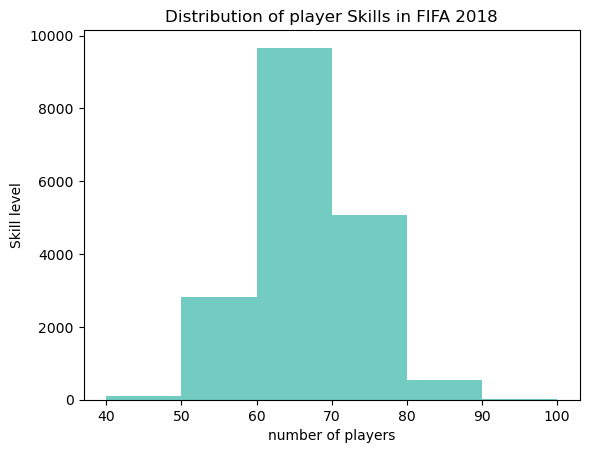

In [24]:
#bins=[0,10,20,30,40,50,60,70,80,90,100]
bins=[40,50,60,70,80,90,100]
plt.hist(fifa.Overall,bins=bins,color='#72ccc1')#color picker from google

plt.xticks(bins)
plt.xlabel('number of players')
plt.ylabel('Skill level')
plt.title('Distribution of player Skills in FIFA 2018')

plt.show()

##  Foot Prference of FIFA Players using Pie chart

Left =  4211
Right =  13948


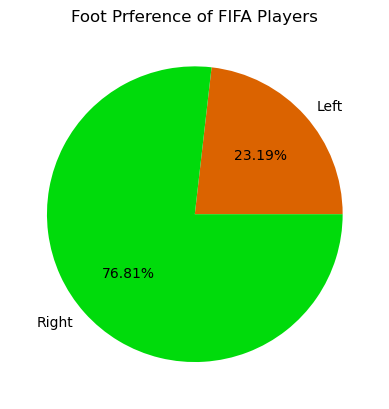

In [25]:
fifa['Preferred Foot']
Left=fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]
print('Left = ',Left)
Right=fifa.loc[fifa['Preferred Foot']=='Right'].count()[0]
print('Right = ',Right)

labels=['Left','Right']
colors=['#db6300','#00db0b']
plt.pie([Left,Right],labels=labels,colors=colors,autopct='%.2f%%')
plt.title('Foot Prference of FIFA Players')



plt.show()


##  Visualizing the Weight Distribution of FIFA players using Pie chart

max =  243.0 

light =  41
light_medium =  2290
medium =  10876
medium_heavy =  4583
heavy =  369


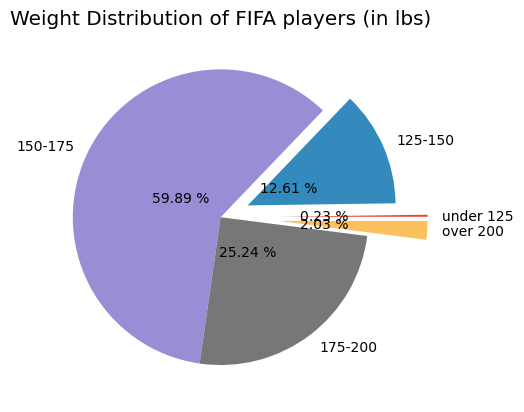

In [26]:
fifa.Weight=[int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]
#removing if there is lbs string term with weight
fifa.Weight

plt.style.use('ggplot')

light=fifa.loc[fifa.Weight<125].count()[0]
light_medium=fifa.loc[(fifa.Weight>=125) & (fifa.Weight<150)].count()[0]
medium=fifa.loc[(fifa.Weight>=150) & (fifa.Weight<175)].count()[0]
medium_heavy=fifa.loc[(fifa.Weight>=175) & (fifa.Weight<200)].count()[0]
heavy=fifa.loc[(fifa.Weight>=200) ].count()[0]

print('max = ',max(fifa.Weight),'\n')
print('light = ',light)
print('light_medium = ',light_medium)
print('medium = ',medium)
print('medium_heavy = ',medium_heavy)
print('heavy = ',heavy)

weights=[light,light_medium,medium,medium_heavy,heavy]
labels=['under 125','125-150','150-175','175-200','over 200']
explode=[0.4,0.2,0,0,0.4]#check for different values
#explode splits the plots into pieces 
#can be used if there is any collisions

plt.title('Weight Distribution of FIFA players (in lbs)')
plt.pie(weights,labels=labels,autopct='%.2f %%',pctdistance=0.3,explode=explode)
plt.show()


##  Team strength Comparison using box and whisker plot

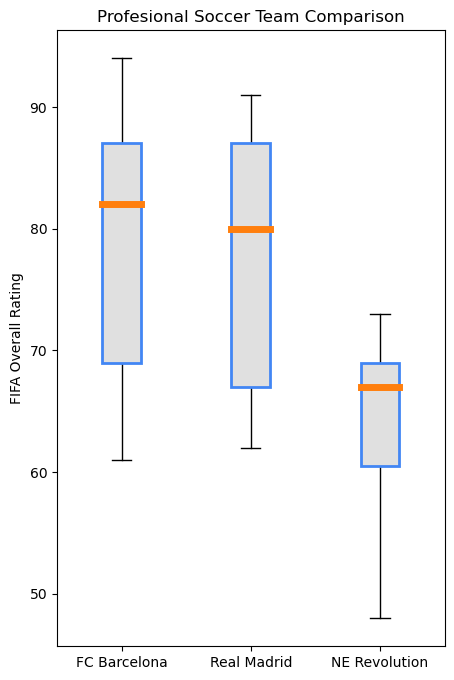

In [27]:
barcelona=fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
barcelona
madrid=fifa.loc[fifa.Club == 'Real Madrid']['Overall']
madrid
revs=fifa.loc[fifa.Club == 'New England Revolution']['Overall']
madrid
plt.style.use('default')
plt.figure(figsize=(5,8))

labels=['FC Barcelona','Real Madrid','NE Revolution']
boxes=plt.boxplot([barcelona,madrid,revs],labels=labels,patch_artist=True,medianprops={'linewidth':5})

for box in boxes['boxes']:
    #set edge color
    box.set(color='#4286f4',linewidth=2)
    #set fill color
    box.set(facecolor='#e0e0e0')

plt.title('Profesional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')
plt.show()
